In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
human_dna = pd.read_table('human_data.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class distribution of Human NA')

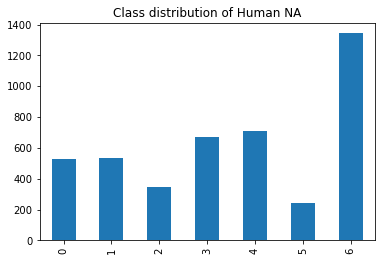

In [2]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human NA")

In [3]:
#lets descripe one dna sequence of human
one_dna = np.array(human_dna.head(1))
one_dna = str(one_dna).split(' ')
seq = one_dna[0].replace("[['",'')
seq = seq.replace("'",'')
print(seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG



In [4]:
#create list of lovercase char and check if any char not in (a, c, g, t) put it as (z) char
def string_to_array(seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'z', seq_string)
    seq_string = np.array(list(seq_string))
    return seq_string
string_to_array(seq)

array(['a', 't', 'g', 'c', 'c', 'c', 'c', 'a', 'a', 'c', 't', 'a', 'a',
       'a', 't', 'a', 'c', 't', 'a', 'c', 'c', 'g', 't', 'a', 't', 'g',
       'g', 'c', 'c', 'c', 'a', 'c', 'c', 'a', 't', 'a', 'a', 't', 't',
       'a', 'c', 'c', 'c', 'c', 'c', 'a', 't', 'a', 'c', 't', 'c', 'c',
       't', 't', 'a', 'c', 'a', 'c', 't', 'a', 't', 't', 'c', 'c', 't',
       'c', 'a', 't', 'c', 'a', 'c', 'c', 'c', 'a', 'a', 'c', 't', 'a',
       'a', 'a', 'a', 'a', 't', 'a', 't', 't', 'a', 'a', 'a', 'c', 'a',
       'c', 'a', 'a', 'a', 'c', 't', 'a', 'c', 'c', 'a', 'c', 'c', 't',
       'a', 'c', 'c', 't', 'c', 'c', 'c', 't', 'c', 'a', 'c', 'c', 'a',
       'a', 'a', 'g', 'c', 'c', 'c', 'a', 't', 'a', 'a', 'a', 'a', 'a',
       't', 'a', 'a', 'a', 'a', 'a', 'a', 't', 't', 'a', 't', 'a', 'a',
       'c', 'a', 'a', 'a', 'c', 'c', 'c', 't', 'g', 'a', 'g', 'a', 'a',
       'c', 'c', 'a', 'a', 'a', 'a', 't', 'g', 'a', 'a', 'c', 'g', 'a',
       'a', 'a', 'a', 't', 'c', 't', 'g', 't', 't', 'c', 'g', 'c

In [5]:
from sklearn import preprocessing

def ordinal_encoder(my_array):
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(np.array(['a','c','g','t','z']))
  integer_encoded = label_encoder.transform(my_array)
  #print(integer_encoded)
  float_encoded = integer_encoded.astype(float)
  float_encoded[float_encoded == 0] = 0.25 # A
  float_encoded[float_encoded == 1] = 0.50 # C
  float_encoded[float_encoded == 2] = 0.75 # G
  float_encoded[float_encoded == 3] = 1.00 # T
  float_encoded[float_encoded == 4] = 0.00 # anything else, lets say z
  return float_encoded


#Let’s try it out a simple short sequence:
seq_test = 'attcgxffgtg'
ordinal_encoder(string_to_array(seq_test))

array([0.25, 1.  , 1.  , 0.5 , 0.75, 0.  , 0.  , 0.  , 0.75, 1.  , 0.75])

In [20]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(np.array(['a','c','g','t','z']))
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    return onehot_encoded
#So let’s try it out with a simple short sequence:
seq_test = 'attcgxffgtg'
one_hot_encoder(string_to_array(seq_test))

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])

In [7]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [8]:
#apply kmers function to all datasets & join all words to list 
#then add words column & drop sequence column
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)




In [9]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [10]:
#apply to human
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

print(y_human)

[4 4 3 ... 6 6 6]


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X_human = cv.fit_transform(human_texts)




In [12]:
print(X_human.shape)


(4380, 232414)


In [13]:
# Splitting the human dataset into the training set and test set with (80% train & 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human,y_human,test_size = 0.20,random_state=42)

In [14]:
#The fit method of SVC class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
#The fit method of KNN class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# enter all test datatest in model  
y_pred = svclassifier.predict(X_test)

In [17]:
# enter all test datatest in model 
y_pred = KNNclassifier.predict(X_test) 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 74   0   0   0   0   0  28]
 [  0  84   0   0   0   0  22]
 [  6   0  61   0   0   0  11]
 [  0   0   0 106   0   0  19]
 [ 10   0   0   0  98   0  41]
 [  3   0   0   0   0  34  14]
 [  0   0   0   0   0   0 265]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       102
           1       1.00      0.79      0.88       106
           2       1.00      0.78      0.88        78
           3       1.00      0.85      0.92       125
           4       1.00      0.66      0.79       149
           5       1.00      0.67      0.80        51
           6       0.66      1.00      0.80       265

    accuracy                           0.82       876
   macro avg       0.92      0.78      0.83       876
weighted avg       0.87      0.82      0.83       876



In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 74   0   0   0   0   0  28]
 [  0  84   0   0   0   0  22]
 [  6   0  61   0   0   0  11]
 [  0   0   0 106   0   0  19]
 [ 10   0   0   0  98   0  41]
 [  3   0   0   0   0  34  14]
 [  0   0   0   0   0   0 265]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       102
           1       1.00      0.79      0.88       106
           2       1.00      0.78      0.88        78
           3       1.00      0.85      0.92       125
           4       1.00      0.66      0.79       149
           5       1.00      0.67      0.80        51
           6       0.66      1.00      0.80       265

    accuracy                           0.82       876
   macro avg       0.92      0.78      0.83       876
weighted avg       0.87      0.82      0.83       876

